In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install --upgrade pip
!pip install flair==0.8

     |████████████████████████████████| 2.1 MB 5.2 MB/s 
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 277.3/277.3 KB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.8/14.8 MB 44.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 KB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 788.5/788.5 KB 39.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 47.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.7/19.7 MB 47.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 KB 47.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━

# ASSIGNMENT 1: Training your own NER model

In this lab we will train a NER model in a **language of your interest** and use it to tag texts for that language. To train a NER (SequenceTagger) model we need the following:


1. An annotated corpus in the IOB2 format. You can load your own or use one of the many available in Flair: https://github.com/flairNLP/flair/blob/master/resources/docs/TUTORIAL_6_CORPUS.md#named-entity-recognition
  + CoNLL 2003 for English and German are not publicly available but you can find the required files in the following google drive folder:
  '/content/drive/My Drive/Colab Notebooks/2021-ILTAPP/datasets/ner'
2. At least one WordEmbedding or FlairEmbeddings. You can check the ones available in the tutorial.
  + Static Word Embeddings:https://github.com/flairNLP/flair/blob/master/resources/docs/embeddings/CLASSIC_WORD_EMBEDDINGS.md
  + FlairEmbeddings: https://github.com/flairNLP/flair/blob/master/resources/docs/embeddings/FLAIR_EMBEDDINGS.md
  + NOTE: Remember that the embeddings can be combined (Stacked): https://github.com/flairNLP/flair/blob/master/resources/docs/TUTORIAL_3_WORD_EMBEDDING.md
3. Instantiate a SequenceTagger and a Model Trainer: https://github.com/flairNLP/flair/blob/master/resources/docs/TUTORIAL_7_TRAINING_A_MODEL.md
4. Run! (perhaps consider downsampling the training data and setting at first a lower number of epochs, just to check that the training works).
5. HINT: You can also print your corpus statistics using the corpus obtain_statistics() function. This will give you an idea of the size of your dataset.

In [3]:
from flair.data import Corpus
from flair.datasets import CONLL_03
from flair.datasets import ColumnCorpus
from flair.embeddings import TokenEmbeddings, WordEmbeddings, StackedEmbeddings, FlairEmbeddings
from typing import List

In [4]:

# define columns
columns = {0: 'text', 1: 'ner'}

#corpus: Corpus = CONLL_03(base_path='resources/tasks')

# this is the folder in which train, test and dev files reside
data_folder = '/content/drive/MyDrive/2022-ILTAPP/datasets/ner'

# init a corpus using column format, data folder and the names of the train, dev and test files
corpus: Corpus = ColumnCorpus(data_folder, columns,
                              train_file='en-train.tsv',
                              test_file='en-testb.tsv',
                              dev_file='en-testa.tsv')

2022-03-07 11:29:06,494 Reading data from /content/drive/MyDrive/2022-ILTAPP/datasets/ner
2022-03-07 11:29:06,505 Train: /content/drive/MyDrive/2022-ILTAPP/datasets/ner/en-train.tsv
2022-03-07 11:29:06,508 Dev: /content/drive/MyDrive/2022-ILTAPP/datasets/ner/en-testa.tsv
2022-03-07 11:29:06,511 Test: /content/drive/MyDrive/2022-ILTAPP/datasets/ner/en-testb.tsv


In [5]:
# 2. what tag do we want to predict?
tag_type = 'ner'

# 3. make the tag dictionary from the corpus
tag_dictionary = corpus.make_tag_dictionary(tag_type=tag_type)
print(tag_dictionary.idx2item)

[b'<unk>', b'O', b'I-ORG', b'I-MISC', b'I-PER', b'I-LOC', b'B-LOC', b'B-MISC', b'B-ORG', b'<START>', b'<STOP>']


In [6]:
# TODO initialize embeddings (output below refers to WordEmbeddings('eu'), 
# FlairEmbeddings('eu-forward') and FlairEmbeddings('eu-backward'))

embedding_types: List[TokenEmbeddings] = [
    WordEmbeddings('glove'),
    FlairEmbeddings('news-forward'),
    FlairEmbeddings('news-backward'),
]



2022-03-07 11:29:21,689 https://flair.informatik.hu-berlin.de/resources/embeddings/token/glove.gensim.vectors.npy not found in cache, downloading to /tmp/tmp_8x_h37v


100%|██████████| 160000128/160000128 [00:09<00:00, 16190851.43B/s]

2022-03-07 11:29:32,001 copying /tmp/tmp_8x_h37v to cache at /root/.flair/embeddings/glove.gensim.vectors.npy


2022-03-07 11:29:32,338 removing temp file /tmp/tmp_8x_h37v
2022-03-07 11:29:32,932 https://flair.informatik.hu-berlin.de/resources/embeddings/token/glove.gensim not found in cache, downloading to /tmp/tmp01oz69mh


100%|██████████| 21494764/21494764 [00:01<00:00, 11163680.72B/s]

2022-03-07 11:29:35,246 copying /tmp/tmp01oz69mh to cache at /root/.flair/embeddings/glove.gensim
2022-03-07 11:29:35,283 removing temp file /tmp/tmp01oz69mh


2022-03-07 11:29:37,344 https://flair.informatik.hu-berlin.de/resources/embeddings/flair/news-forward-0.4.1.pt not found in cache, downloading to /tmp/tmpbc5zwp20


100%|██████████| 73034624/73034624 [00:03<00:00, 18668469.08B/s]

2022-03-07 11:29:41,668 copying /tmp/tmpbc5zwp20 to cache at /root/.flair/embeddings/news-forward-0.4.1.pt


2022-03-07 11:29:41,850 removing temp file /tmp/tmpbc5zwp20
2022-03-07 11:29:54,532 https://flair.informatik.hu-berlin.de/resources/embeddings/flair/news-backward-0.4.1.pt not found in cache, downloading to /tmp/tmpkh5ttwvx


100%|██████████| 73034575/73034575 [00:04<00:00, 17438553.75B/s]

2022-03-07 11:29:59,106 copying /tmp/tmpkh5ttwvx to cache at /root/.flair/embeddings/news-backward-0.4.1.pt


2022-03-07 11:29:59,260 removing temp file /tmp/tmpkh5ttwvx


In [7]:
# TODO initialize sequence tagger
from flair.models import SequenceTagger

print(corpus.train[0].to_tagged_string('ner'))
#print(corpus.train[1].to_tagged_string('pos'))

embeddings: StackedEmbeddings = StackedEmbeddings(embeddings=embedding_types)

tagger: SequenceTagger = SequenceTagger(hidden_size=256,
                                        embeddings=embeddings,
                                        tag_dictionary=tag_dictionary,
                                        tag_type=tag_type,
                                        use_crf=True)

-DOCSTART-


In [8]:
# TODO initialize trainer
from flair.trainers import ModelTrainer

trainer: ModelTrainer = ModelTrainer(tagger, corpus)

# TODO train 
# saving the model into your drive (need to provide the full path of the folder in which you want to save the model)
# results obtained with the BASQUE NER corpus over 10 epochs (inspect the output generated below)


trainer.train('/content/drive/MyDrive/2022-ILTAPP/resources/flair_model',
              learning_rate=0.1,
              mini_batch_size=32,
              train_with_dev=True,
              write_weights=True,
              max_epochs=10)


2022-03-07 11:30:00,653 ----------------------------------------------------------------------------------------------------
2022-03-07 11:30:00,656 Model: "SequenceTagger(
  (embeddings): StackedEmbeddings(
    (list_embedding_0): WordEmbeddings('glove')
    (list_embedding_1): FlairEmbeddings(
      (lm): LanguageModel(
        (drop): Dropout(p=0.05, inplace=False)
        (encoder): Embedding(300, 100)
        (rnn): LSTM(100, 2048)
        (decoder): Linear(in_features=2048, out_features=300, bias=True)
      )
    )
    (list_embedding_2): FlairEmbeddings(
      (lm): LanguageModel(
        (drop): Dropout(p=0.05, inplace=False)
        (encoder): Embedding(300, 100)
        (rnn): LSTM(100, 2048)
        (decoder): Linear(in_features=2048, out_features=300, bias=True)
      )
    )
  )
  (word_dropout): WordDropout(p=0.05)
  (locked_dropout): LockedDropout(p=0.5)
  (embedding2nn): Linear(in_features=4196, out_features=4196, bias=True)
  (rnn): LSTM(4196, 256, batch_first=True, b

{'dev_loss_history': [],
 'dev_score_history': [],
 'test_score': 0.9190247374977755,
 'train_loss_history': [2.331222440175828,
  1.125962456187921,
  0.9074738920767964,
  0.8047914162304001,
  0.715126863953559,
  0.663459277571384,
  0.6189643016772626,
  0.5952826099182952,
  0.5703612693312676,
  0.5443374804597174]}

2022-03-07 12:01:07,070 ----------------------------------------------------------------------------------------------------
2022-03-07 12:01:07,072 WARNING: No LOSS found for test split in this data.
2022-03-07 12:01:07,073 Are you sure you want to plot LOSS and not another value?
2022-03-07 12:01:07,075 ----------------------------------------------------------------------------------------------------
2022-03-07 12:01:07,117 ----------------------------------------------------------------------------------------------------
2022-03-07 12:01:07,118 WARNING: No F1 found for test split in this data.
2022-03-07 12:01:07,123 Are you sure you want to plot F1 and not another value?
2022-03-07 12:01:07,127 ----------------------------------------------------------------------------------------------------


No handles with labels found to put in legend.


Loss and F1 plots are saved in /content/drive/MyDrive/2022-ILTAPP/resources/flair_model/training.png


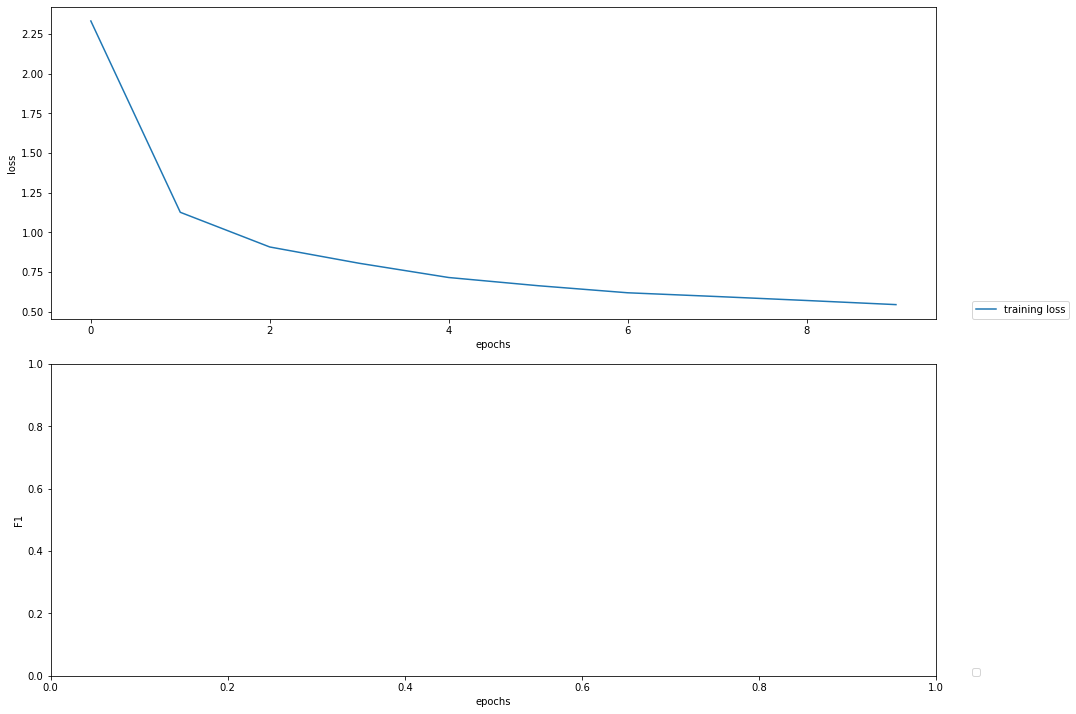

Weights plots are saved in /content/drive/MyDrive/2022-ILTAPP/resources/flair_model/weights.png


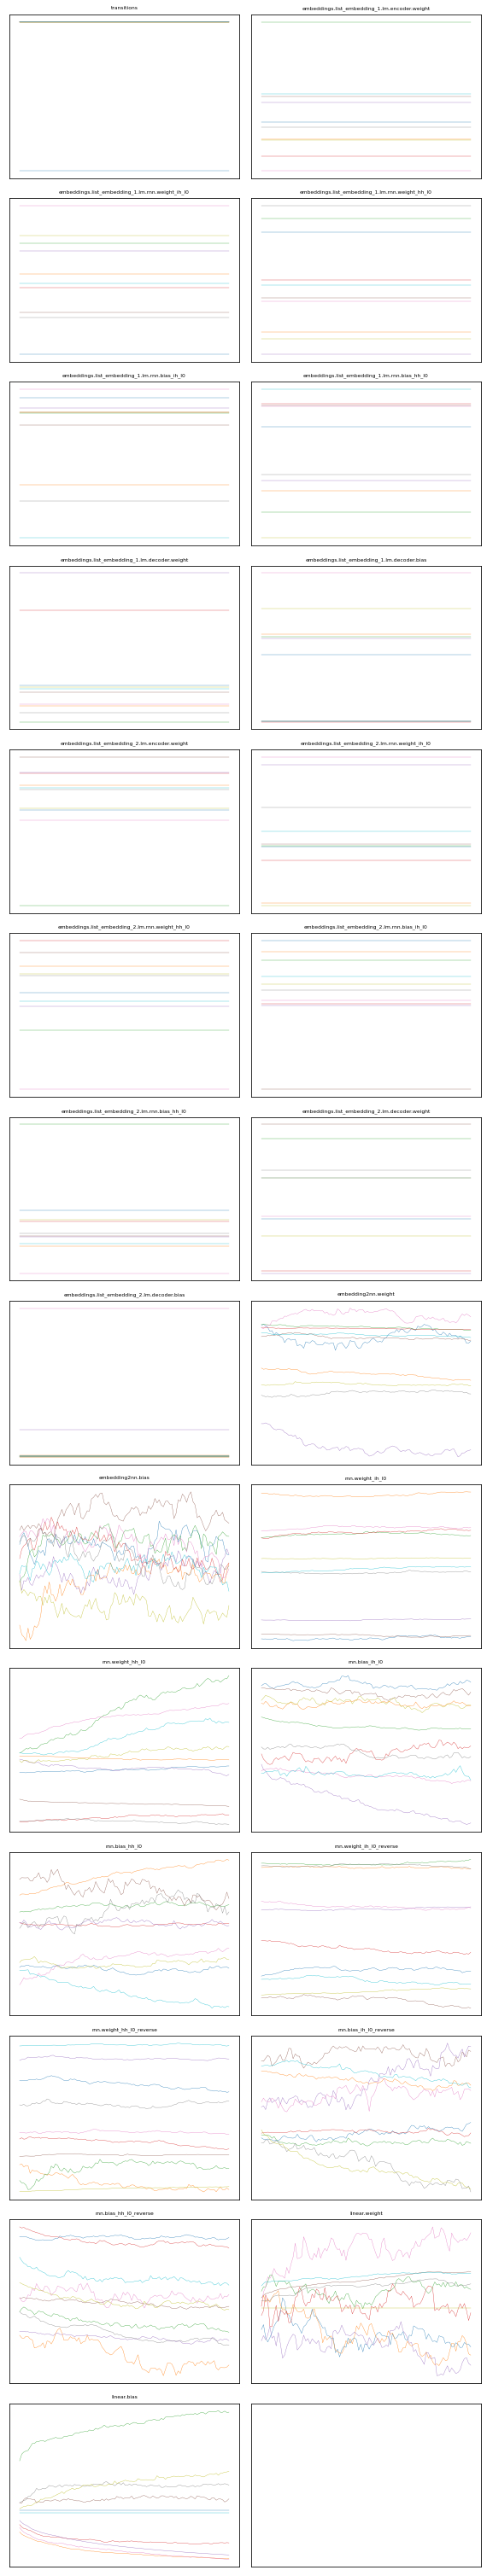

In [9]:
# # TODO plot training loss and weights
# HINT Check documentation on training models with Flair
from flair.visual.training_curves import Plotter

plotter = Plotter()
plotter.plot_training_curves('/content/drive/MyDrive/2022-ILTAPP/resources/flair_model/loss.tsv')
plotter.plot_weights('/content/drive/MyDrive/2022-ILTAPP/resources/flair_model/weights.txt')

# ASSIGNMENT 2

In this assignment we will use the model trained in the previous step to automatically tag a document of your choice.

1. HINT: Revise the TUTORIAL_2_TAGGING to see how to use a SequenceTagger to tag texts. Remember that to use your own model you need to instantiate the SequenceTagger providing the full path of your model, like so:

```
ner_tagger = SequenceTagger.load('/content/drive/My Drive/Colab Notebooks/2021-ILTAPP/eu-flair-model/final-model.pt')
```

2. Save the document in your drive as a plain text file.
3. Load the file and instantiate the SequenceTagger with your model.
4. Predict the NER tags with your model.
5. Inspect the annotations obtained. You can do this in various ways:
  + By saving the annotated file to a text document in your drive.
  + By inspecting the annotations via iteration over the Sentence objects to extract the ner annotations for each token.


In [10]:
import os
from flair.tokenization import SegtokSentenceSplitter
from flair.models import SequenceTagger

f = open('/content/drive/MyDrive/2022-ILTAPP/datasets/news.txt', 'r')

text = f.read()

f.close()

print(text)


splitter = SegtokSentenceSplitter()
sentences = splitter.split(text)

tagger = SequenceTagger.load('/content/drive/MyDrive/2022-ILTAPP/resources/flair_model/final-model.pt')

tagger.predict(sentences)

for sentence in sentences:
    print(sentence.to_tagged_string())





To keep up with major developments from our reporters across the globe, sign up for WSJ’s free daily newsletter.

In Ukraine: Kyiv is making a second attempt to evacuate civilians from its besieged cities saying a cease-fire is set after accusing Moscow of resuming attacks on residential areas.

Residents were waiting for an all-clear to launch a convoy of city buses from Mariupol on Sunday morning.

The U.S. is exploring a deal in which Poland would send Soviet-era aircraft to Ukraine in return for American F-16 jet fighters, U.S. officials said Saturday

In Russia: Visa Inc. and Mastercard Inc. said they are suspending their Russian operations. The card networks earlier said they would no longer handle card operations pertaining to sanctioned Russian banks and are now extending that to all card issuers and merchant processors in Russia. The move will have a major impact on foreigners in the country but Russian cardholders are still able to use these cards for purchases in Russia.

Uk